In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import The CSV
tsla_data = pd.read_csv('data/TSLA.csv', index_col='Date', parse_dates=True)

In [3]:
tsla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-09,228.970001,231.000000,227.279999,230.059998,230.059998,6190800
2019-07-10,234.149994,238.940002,233.139999,238.919998,238.919998,9145700
2019-07-11,238.139999,241.500000,235.800003,238.600006,238.600006,7514400
2019-07-12,239.750000,245.380005,239.710007,245.080002,245.080002,9200500
2019-07-15,248.000000,254.419998,244.860001,253.500000,253.500000,11000100


### Data Visualization

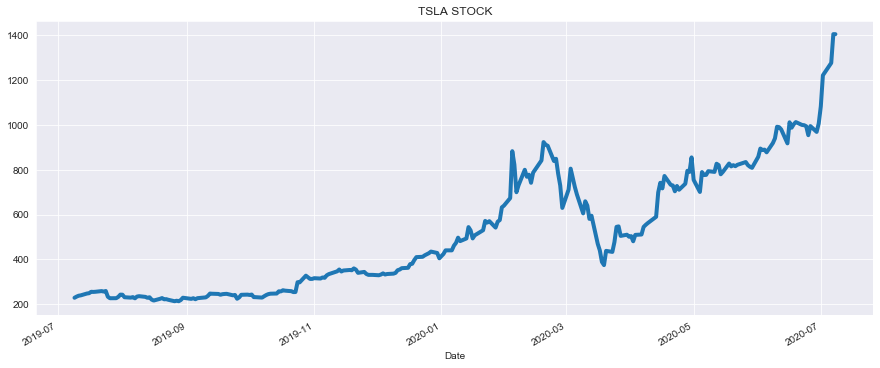

In [4]:
# Let's Analyze & Visualize The Open Prices
sns.set_style('darkgrid')
tsla_data['Open'].plot(linewidth=4, figsize=(15, 6), title='TSLA STOCK')

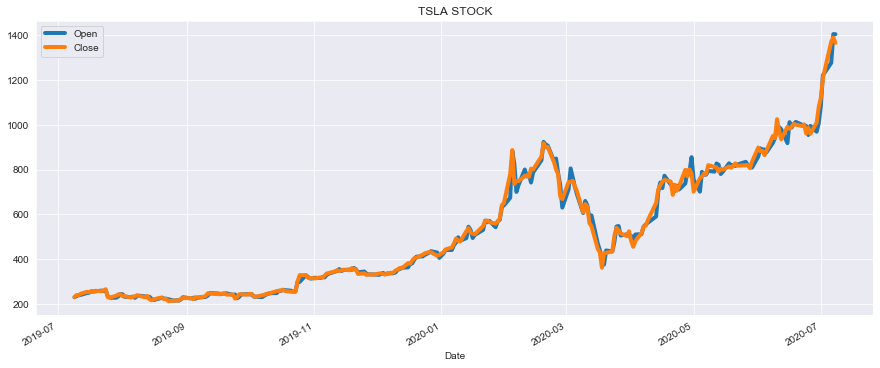

In [5]:
# Let's Analyze & Visualize The Open and Close Prices
tsla_data[['Open', 'Close']].plot(linewidth=4, figsize=(15, 6), title='TSLA STOCK')

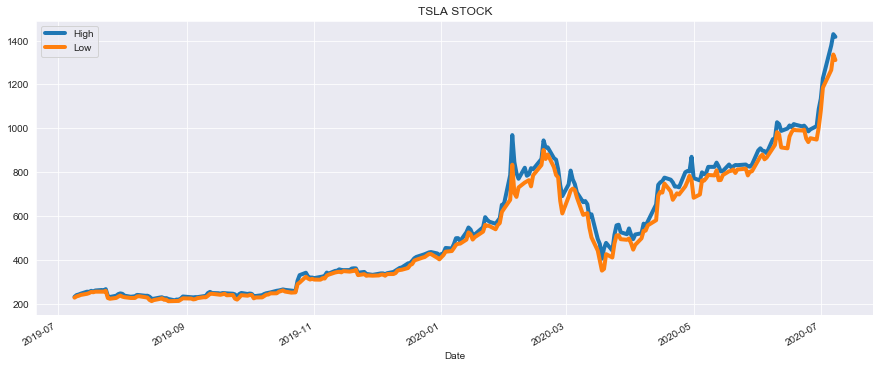

In [6]:
# Let's Analyze & Visualize The High and Low Prices
tsla_data[['High', 'Low']].plot(linewidth=4, figsize=(15, 6), title='TSLA STOCK')

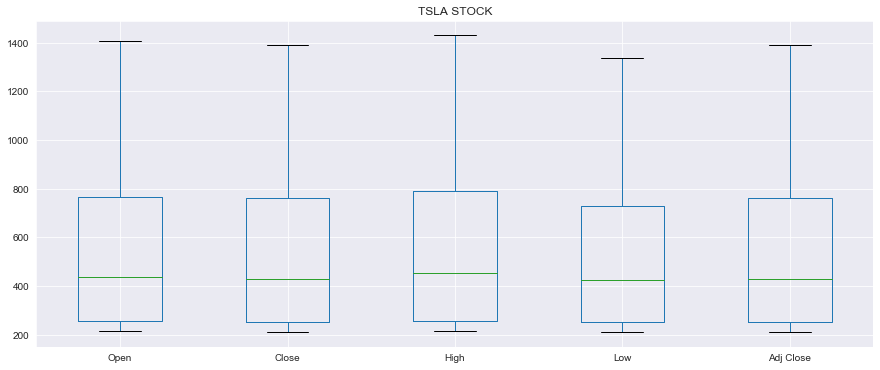

In [7]:
# Let's Analyze & Visualize The All Four Prices
tsla_data[['Open', 'Close', 'High', 'Low', 'Adj Close']].plot(kind='box', figsize=(15, 6), title='TSLA STOCK')

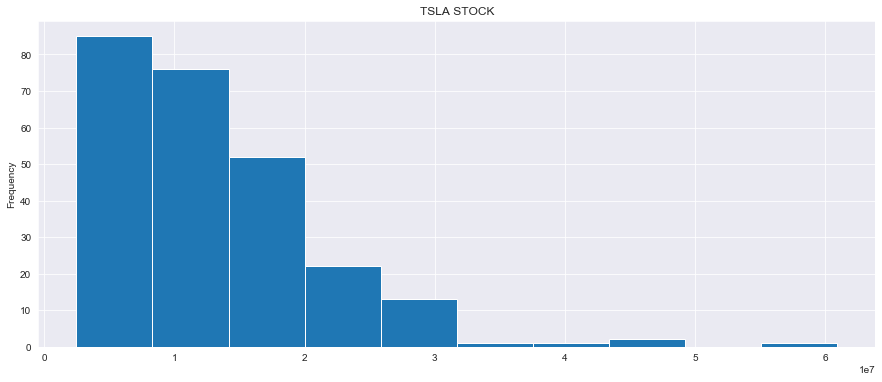

In [8]:
# Let's Analyze and Visualize The Volume
tsla_data['Volume'].plot.hist(figsize=(15, 6), title='TSLA STOCK')

### Data Preprocessing

In [9]:
# Info
tsla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-07-09 to 2020-07-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [10]:
# Describe
tsla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,515.750752,529.737431,502.519605,517.133479,517.133479,1.311115e+07
std,274.306105,282.916953,264.929395,275.094640,275.094640,8.198828e+06
min,213.600006,215.020004,211.000000,211.399994,211.399994,2.465600e+06
25%,254.320007,256.140015,250.179993,253.539993,253.539993,7.048400e+06
50%,435.000000,451.559998,425.790009,430.380005,430.380005,1.111640e+07
75%,763.960022,789.750000,730.000000,761.190002,761.190002,1.691850e+07
max,1405.010010,1429.500000,1336.709961,1389.859985,1389.859985,6.093880e+07


In [16]:
# Split the data into X, y
X = tsla_data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = tsla_data['Close']

X.shape, y.shape

((253, 5), (253,))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [21]:
# Shapes
X_train.shape, y_train.shape

((227, 5), (227,))

In [22]:
# Shapes
X_test.shape, y_test.shape

((26, 5), (26,))

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Building The Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Build a linear regression model
model = LinearRegression()

In [35]:
# Train the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction & Model Evaluate & Model Accuracy

In [42]:
# Make Predictions
prediction = model.predict(X_test)

In [44]:
# Predictions VS Y_true
pred_vs_true = pd.DataFrame({'Actual Close': y_test, 'Predicted Close': prediction})

pred_vs_true

,Actual Close,Predicted Close
Date,,
2019-08-23,211.399994,214.080002
2019-10-31,314.920013,319.509949
2019-09-03,225.009995,227.941105
2019-07-17,254.860001,258.341839
2019-12-30,414.700012,421.130873
2019-12-06,335.890015,340.866844
2020-05-28,805.809998,819.456776
2020-03-18,361.220001,366.664164
2020-06-23,1001.780029,1019.042423


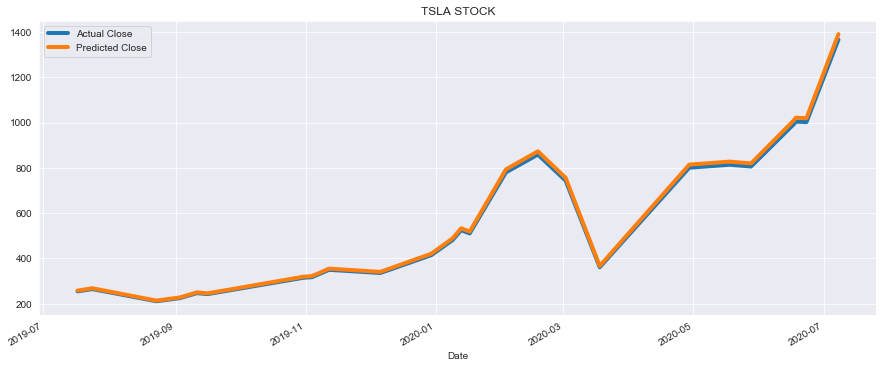

In [51]:
# Let's visualize the predictions & actual
pred_vs_true[['Actual Close', 'Predicted Close']].plot(linewidth=4, figsize=(15, 6), title='TSLA STOCK')